In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker

from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from wordcloud import WordCloud

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [ ]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [2]:
#Features
features = pd.read_excel('Hot 100 Audio Features.xlsx')

In [3]:
features.head(3)

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'easy listening', 'mellow gold']",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e5312be7ccce98176cff46d7879?cid=b8d3901151d34489a160e3cf0ab1fa94,166106.0,0.0,The Essential Andy Williams,0.154,0.185,5.0,-14.063,1.0,0.0315,0.911,0.000267,0.112,0.15,83.969,4.0,38.0


In [4]:
# Number of entries by Column
features.count()

SongID                       29503
Performer                    29503
Song                         29503
spotify_genre                27903
spotify_track_id             24397
spotify_track_preview_url    14491
spotify_track_duration_ms    24397
spotify_track_explicit       24397
spotify_track_album          24391
danceability                 24334
energy                       24334
key                          24334
loudness                     24334
mode                         24334
speechiness                  24334
acousticness                 24334
instrumentalness             24334
liveness                     24334
valence                      24334
tempo                        24334
time_signature               24334
spotify_track_popularity     24397
dtype: int64

In [5]:
#Null Values by Column
features.isnull().sum()

SongID                           0
Performer                        0
Song                             0
spotify_genre                 1600
spotify_track_id              5106
spotify_track_preview_url    15012
spotify_track_duration_ms     5106
spotify_track_explicit        5106
spotify_track_album           5112
danceability                  5169
energy                        5169
key                           5169
loudness                      5169
mode                          5169
speechiness                   5169
acousticness                  5169
instrumentalness              5169
liveness                      5169
valence                       5169
tempo                         5169
time_signature                5169
spotify_track_popularity      5106
dtype: int64

In [6]:
#Number of UNIQUE values by Column
features.apply(pd.Series.nunique)

SongID                       29386
Performer                    10059
Song                         24359
spotify_genre                 3375
spotify_track_id             24177
spotify_track_preview_url    14371
spotify_track_duration_ms    13984
spotify_track_explicit           2
spotify_track_album          13124
danceability                   837
energy                         985
key                             12
loudness                     11165
mode                             2
speechiness                   1230
acousticness                  3057
instrumentalness              4424
liveness                      1611
valence                       1103
tempo                        20485
time_signature                   5
spotify_track_popularity       101
dtype: int64

In [7]:
#Convert "Spotify Genres" from Desired Dataframe to a Long String

def genre_df_to_string(df_column):
    
    clean_series = df_column.replace('[]', np.nan).dropna()
    
    new = []
    for item in clean_series:
        for ch in ['\\','`','*','_','{','}','[',']','(',')'
                   ,'>','#','+','.','!','$','\'']:

            if ch in item:
                item = item.replace(ch,'')
        new.append(item)
    
    string = ', '.join(new)
    return string

In [11]:
genre_string = genre_df_to_string(features['spotify_genre'])
genre_string

'novelty, adult standards, brill building pop, easy listening, mellow gold, rock-and-roll, space age pop, surf music, dance pop, pop, post-teen pop, pop, post-teen pop, east coast hip hop, hip hop, pop rap, rap, southern hip hop, album rock, bubblegum pop, country rock, folk rock, mellow gold, new wave pop, soft rock, yacht rock, english indie rock, country, country dawn, nashville sound, funk, motown, neo soul, new jack swing, quiet storm, r&b, soul, urban contemporary, australian country, contemporary country, country, country road, funk, neo soul, new jack swing, quiet storm, r&b, urban contemporary, blues rock, garage rock, modern blues rock, neo-psychedelic, nu gaze, punk blues, pop, post-teen pop, adult standards, brill building pop, folk, folk rock, mellow gold, singer-songwriter, soft rock, yacht rock, memphis soul, southern soul, classic soul, disco, funk, jazz funk, memphis soul, motown, quiet storm, soul, southern soul, adult standards, disco, funk, jazz funk, motown, quiet 

In [12]:
#Create a WordCloud from a any String

def string_to_wordcloud(string):
    
    # WordCloud Object
    wordcloud = WordCloud(background_color="white", max_words=5000, 
                      contour_width=3, contour_color='steelblue',
                       width=600, height=400)
    
    # Generate a word cloud
    wordcloud.generate(string)

    # Visualize the word cloud
    return wordcloud.to_image()

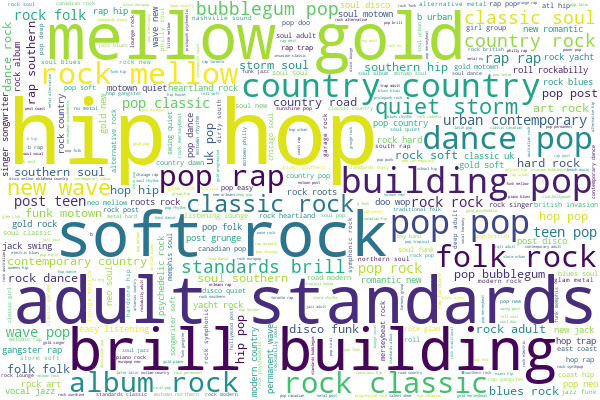

In [13]:
string_to_wordcloud(genre_string)

In [18]:
#Take a WordCloud String and Do a Frequency Count

def genre_sorted_freq(word_cloud_string):
    
    a = [item.strip() for item in word_cloud_string.split(',')]
    dict =  {k:a.count(k) for k in set(a)}
    sorted_list = sorted(dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_list

In [19]:
genre_sorted_freq(genre_string)

[('mellow gold', 3961),
 ('soft rock', 3782),
 ('adult standards', 3724),
 ('brill building pop', 3305),
 ('rock', 3236),
 ('dance pop', 3095),
 ('pop', 3028),
 ('soul', 2903),
 ('motown', 2769),
 ('pop rap', 2593),
 ('rap', 2559),
 ('folk rock', 2538),
 ('album rock', 2433),
 ('classic rock', 2411),
 ('quiet storm', 2255),
 ('hip hop', 2175),
 ('bubblegum pop', 2086),
 ('rock-and-roll', 1964),
 ('funk', 1943),
 ('classic soul', 1936),
 ('urban contemporary', 1777),
 ('country', 1760),
 ('r&b', 1617),
 ('disco', 1606),
 ('post-teen pop', 1561),
 ('new wave pop', 1484),
 ('contemporary country', 1473),
 ('country rock', 1390),
 ('southern soul', 1360),
 ('country road', 1351),
 ('trap', 1291),
 ('pop rock', 1211),
 ('folk', 1204),
 ('southern hip hop', 1183),
 ('hard rock', 1158),
 ('lounge', 1150),
 ('hip pop', 1063),
 ('rhythm and blues', 958),
 ('rockabilly', 952),
 ('art rock', 916),
 ('dance rock', 913),
 ('new jack swing', 858),
 ('merseybeat', 835),
 ('classic uk pop', 812),
 ('e